In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 4 May 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# print(tmp_files_dir + expt + '_Tf_heat_transp_1500m_daily')

In [5]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily')
Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_5daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# # load ice draft to create masks
# expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
# Tf_heat_transport_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
# heat_transport_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
# temp_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
# z_rho_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CalvingFront')
# dist_along_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CalvingFront')
# lon_along_10kmCF = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CalvingFront')
# lat_along_10kmCF = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CalvingFront')
# distance_indices_10kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [7]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()


# ds = xr.open_dataset(tmp_files_dir + expt + 'z_rho_1500m_daily')
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 39.9 ms, sys: 28.4 ms, total: 68.3 ms
Wall time: 126 ms


In [8]:
# expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
# Tf_heat_transport_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
# heat_transport_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
# temp_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
# z_rho_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CalvingFront')
# dist_along_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CalvingFront')
# lon_along_4kmCF = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CalvingFront')
# lat_along_4kmCF = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CalvingFront')
# distance_indices_4kmCF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [9]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily')
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 22 ms, sys: 17.7 ms, total: 39.7 ms
Wall time: 270 ms


In [10]:
# expt = 'WAOM4_notides'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
# Tf_heat_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
# heat_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
# temp_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
# z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
# z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [11]:
print(heat_transport_10km.shape)

(73, 31, 2588)


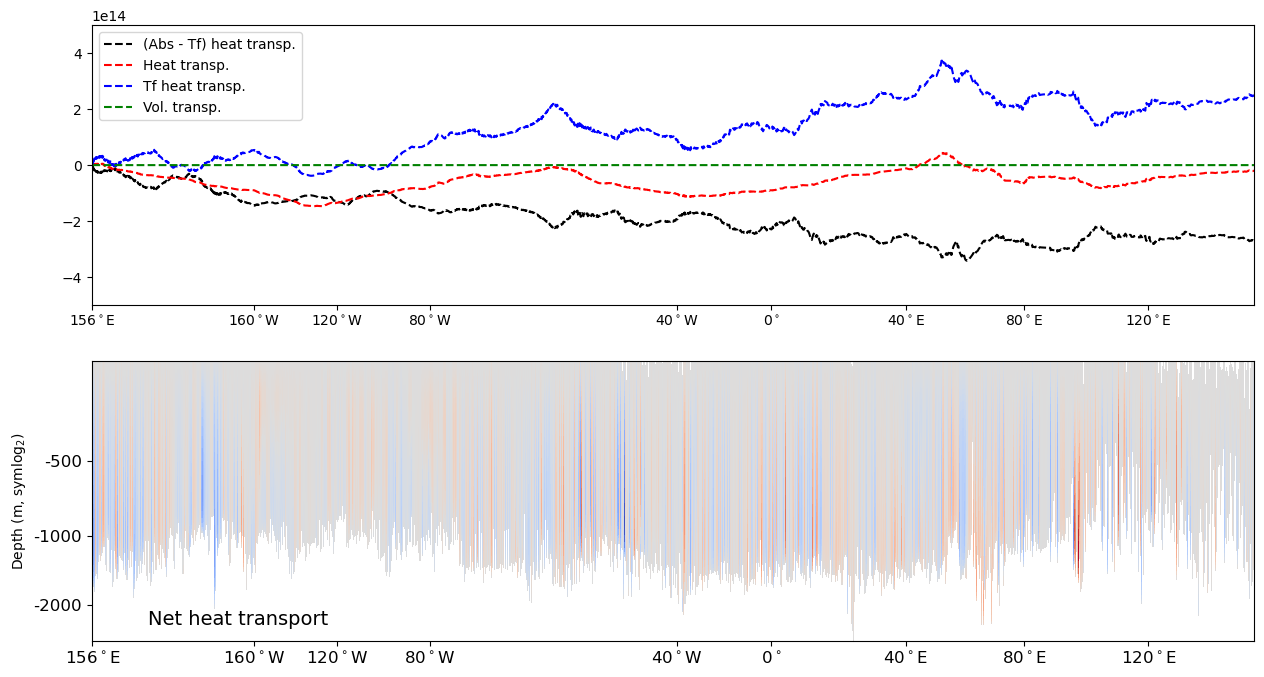

In [12]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
# along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))


# some plots:
fig, ax = plt.subplots(nrows=2, figsize = (15, 8))
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '--k', label='(Abs - Tf) heat transp.') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km), axis=0), axis=1),axis=0)), '--r', label='Heat transp.') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '--b', label='Tf heat transp.') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((vol_transport_10km), axis=0), axis=1),axis=0)), '--g', label='Vol. transp.') 
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-5e14, 5e14)
ax[0].legend()

tt=30
# cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1), vmin=-5e13 , vmax=5e13, cmap='coolwarm')
cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), cmap='coolwarm')#, vmin=-1e-10 , vmax=1e-10)#
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'Net heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)
# plt.colorbar(ax=ax[1])

# Daily/5-daily files:

When during daily, I saved separated the heat_transp and Tf_heat_transp variables. 
For annual mean files, the heat_transp is already the abosulte heat_transp minus Tf_heat_transp
In daily files, the heat transport is simply the absolute heat_transp, so need to subtract Tf_heat_transp from it,
to obtain the heat transport referenced to the minimum temperature at the shelf break (e.g., -1.95degC at WAOM10)


In [ ]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
# along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

# some plots:
fig, ax = plt.subplots(nrows=2, figsize = (10, 12))

ax[0].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4km-Tf_heat_transport_4km), axis=0), axis=1),axis=0)), '-b', label='WAOM4') 
ax[0].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT-Tf_heat_transport_4kmNT), axis=0), axis=1),axis=0)), '-c', label='WAOM4-NOTIDE')
# fixing longitude axis (tricky across resolution!):
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
ax[0].set_ylim(-0.5e15, 1.5e15)
ax[0].set_xlabel('Longitude coordinates along contour')
ax[0].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[0].grid()
ax[0].legend()

ax[1].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10') 
# ax[1].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((vol_transport_10km*Cp*rho0*(temp_10km+3)), axis=0), axis=1),axis=0))*1e-6, '--b', label='WAOM10') 
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
# ax[1].set_ylim(-0.4e15, 0.e15)
ax[1].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[1].grid()
ax[1].legend()

# ax[2].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((vol_transport_10km), axis=0), axis=1),axis=0))*1e-6, '-m', label='WAOM10') 
# ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
# ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# ax[2].set_xlim(0, dist_along_10km[-1])
# # ax[2].set_ylim(-0.5e15, 1.5e15)
# ax[2].set_xlabel('Longitude coordinates along contour')
# ax[2].set_ylabel('Cumulative volume transport \n across 1500m isobath (Sv)');
# ax[2].grid()
# ax[2].legend()



name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_raw_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)


In [ ]:
# calculate sum circum-antarctic metrics:
cross_heat_trans_10km=np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)
cross_heat_trans_4km=np.sum(np.cumsum(np.nanmean((heat_transport_4km-Tf_heat_transport_4km), axis=0), axis=1),axis=0)
cross_heat_trans_4kmNT=np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT-Tf_heat_transport_4kmNT), axis=0), axis=1),axis=0)
    
print(' WAOM10 ')
print(np.nanmean(cross_heat_trans_10km)*1e-15)
print(cross_heat_trans_10km[0]*1e-15)
print(cross_heat_trans_10km[-1]*1e-15)
print((cross_heat_trans_10km[-1]-cross_heat_trans_10km[-1])*1e-15)

print(' WAOM4 ') 
print(np.nanmean(cross_heat_trans_4km)*1e-15)
print(cross_heat_trans_4km[0]*1e-15)
print(cross_heat_trans_4km[-1]*1e-15)
print((cross_heat_trans_4km[-1]-cross_heat_trans_4km[-1])*1e-15)

print(' WAOM4-NOTIDE ')
print(np.nanmean(cross_heat_trans_4kmNT)*1e-15)
print(cross_heat_trans_4kmNT[0]*1e-15)
print(cross_heat_trans_4kmNT[-1]*1e-15)
print((cross_heat_trans_4kmNT[-1]-cross_heat_trans_4kmNT[0])*1e-15)

In [ ]:
plt.plot(dist_along_4km[distance_indices_4km.astype(int)[:]])
plt.plot(dist_along_10km[distance_indices_10km.astype(int)[:]])
print(dist_along_10km.shape, dist_along_4km.shape)
print(max(dist_along_10km), max(dist_along_4km))

In [ ]:
# seasonal plots:
months_5d=np.arange(0,73)*(5/30.41667)

sum_5d=np.where((months_5d>=0)&(months_5d<=3))
aut_5d=np.where((months_5d>=4)&(months_5d<=6))
win_5d=np.where((months_5d>=7)&(months_5d<=9))
spr_5d=np.where((months_5d>=10)&(months_5d<=12))
# print(sum_5d,aut_5d,win_5d,spr_5d)

months_1d=np.arange(0,365)*(1/30.41667)

sum_1d=np.where((months_1d>=0)&(months_1d<=3))
aut_1d=np.where((months_1d>=4)&(months_1d<=6))
win_1d=np.where((months_1d>=7)&(months_1d<=9))
spr_1d=np.where((months_1d>=10)&(months_1d<=12))
# print(sum_1d,aut_1d,win_1d,spr_1d)


In [ ]:
# plot w/ 4 seasons:

fig, ax = plt.subplots(nrows=3, figsize = (10, 12))
# WAOM10
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km[sum_5d[0],:,:]-Tf_heat_transport_10km[sum_5d[0],:,:]), axis=0), axis=1),axis=0)), '--r', label='WAOM10 summer') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km[aut_5d[0],:,:]-Tf_heat_transport_10km[aut_5d[0],:,:]), axis=0), axis=1),axis=0)), '--c', label='WAOM10 autumn') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km[win_5d[0],:,:]-Tf_heat_transport_10km[win_5d[0],:,:]), axis=0), axis=1),axis=0)), '--b', label='WAOM10 winter') 
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km[spr_5d[0],:,:]-Tf_heat_transport_10km[spr_5d[0],:,:]), axis=0), axis=1),axis=0)), '--m', label='WAOM10 spring') 
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-0.5e15, 1.6e15)
# ax[0].set_xlabel('Longitude coordinates along contour')
ax[0].set_ylabel('WAOM10 \n Cumulative heat transport \n across 1500m isobath (W)');
ax[0].grid('on')
ax[0].legend()

# WAOM4
ax[1].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4km[sum_1d[0],:,:]-Tf_heat_transport_4km[sum_1d[0],:,:]), axis=0), axis=1),axis=0)), '--r', label='WAOM4 summer') 
ax[1].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4km[aut_1d[0],:,:]-Tf_heat_transport_4km[aut_1d[0],:,:]), axis=0), axis=1),axis=0)), '--c', label='WAOM4 autumn') 
ax[1].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4km[win_1d[0],:,:]-Tf_heat_transport_4km[win_1d[0],:,:]), axis=0), axis=1),axis=0)), '--b', label='WAOM4 winter') 
ax[1].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4km[spr_1d[0],:,:]-Tf_heat_transport_4km[spr_1d[0],:,:]), axis=0), axis=1),axis=0)), '--m', label='WAOM4 spring') 
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].set_ylim(-0.5e15, 1.6e15)
# # ax[1].set_xlabel('Longitude coordinates along contour')
ax[1].set_ylabel('WAOM4 \n Cumulative heat transport \n across 1500m isobath (W)');
ax[1].grid('on')
ax[1].legend()

# WAOM4-NT
ax[2].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT[sum_1d[0],:,:]-Tf_heat_transport_4kmNT[sum_1d[0],:,:]), axis=0), axis=1),axis=0)), '--r', label='WAOM4-NOTIDE summer') 
ax[2].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT[aut_1d[0],:,:]-Tf_heat_transport_4kmNT[aut_1d[0],:,:]), axis=0), axis=1),axis=0)), '--c', label='WAOM4-NOTIDE autumn') 
ax[2].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT[win_1d[0],:,:]-Tf_heat_transport_4kmNT[win_1d[0],:,:]), axis=0), axis=1),axis=0)), '--b', label='WAOM4-NOTIDE winter') 
ax[2].plot(dist_along_4km,(np.sum(np.cumsum(np.nanmean((heat_transport_4kmNT[spr_1d[0],:,:]-Tf_heat_transport_4kmNT[spr_1d[0],:,:]), axis=0), axis=1),axis=0)), '--m', label='WAOM4-NOTIDE spring') 
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].set_ylim(-0.5e15, 1.6e15)
ax[2].set_xlabel('Longitude coordinates along contour')
ax[2].set_ylabel('WAOM4-NOTIDE \n Cumulative heat transport \n across 1500m isobath (W)');
ax[2].grid('on')
ax[2].legend()

name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_seasonal.png'
plt.savefig(fig_path + name_fig, dpi=300)


# Decomposition mean and eddy heat transport:


In [25]:
# separate mean and eddy: WAOM10

# mean
Net_heat_transport_10km = heat_transport_10km - Tf_heat_transport_10km # difference abs - Tf
# print(Net_heat_transport_10km)
Net_heat_transport_10km_tavg = Net_heat_transport_10km.mean('ocean_time') # time mean
Net_heat_transport_10km_vint = Net_heat_transport_10km.sum('s_rho') # vertical integral
print(Net_heat_transport_10km_vint.shape, Net_heat_transport_10km_tavg.shape)
Net_heat_transport_10km_tavg_vint = Net_heat_transport_10km_tavg.sum('s_rho') # vertical integral
Net_heat_transport_10km_tavg_vint_cumsum = Net_heat_transport_10km_tavg_vint.cumsum('contour_index_array') # cumsum along contour
# print(Net_heat_transport_10km_tavg_vint_cumsum.shape)
## Net_heat_transport_10km_tavg_vint_cumsum = MEAN

# EDDY component:
Net_heat_transport_10km_eia = np.empty(Net_heat_transport_10km[:,:,:].shape)
Net_heat_transport_10km_eia_vint = np.empty(Net_heat_transport_10km[:,0,:].shape)

for tt in np.arange(0,len(Net_heat_transport_10km[:,0,0])):
    # print(tt,Net_heat_transport_10km_vint.isel(ocean_time=tt).shape, Net_heat_transport_10km_tavg_vint.shape)
    Net_heat_transport_10km_eia[tt,:,:] = Net_heat_transport_10km.isel(ocean_time=tt) - Net_heat_transport_10km_tavg
    Net_heat_transport_10km_eia_vint[tt,:] = np.sum((Net_heat_transport_10km.isel(ocean_time=tt) - Net_heat_transport_10km_tavg), axis=0)

## ---
# 1. nanmean in time 
# 2. cumsum along contour
# 3. sum vertical 
###np.sum(np.cumsum(np.nanmean((heat_transport_10km[sum_5d[0],:,:]-Tf_heat_transport_10km[sum_5d[0],:,:]), axis=0), axis=1),axis=0)



(73, 2588) (31, 2588)


In [26]:
# separate mean and eddy: WAOM4

# mean
Net_heat_transport_4km = heat_transport_4km - Tf_heat_transport_4km # difference abs - Tf
# print(Net_heat_transport_4km)
Net_heat_transport_4km_tavg = Net_heat_transport_4km.mean('ocean_time') # time mean
Net_heat_transport_4km_vint = Net_heat_transport_4km.sum('s_rho') # vertical integral
print(Net_heat_transport_4km_vint.shape, Net_heat_transport_4km_tavg.shape)
Net_heat_transport_4km_tavg_vint = Net_heat_transport_4km_tavg.sum('s_rho') # vertical integral
Net_heat_transport_4km_tavg_vint_cumsum = Net_heat_transport_4km_tavg_vint.cumsum('contour_index_array') # cumsum along contour
# print(Net_heat_transport_4km_tavg_vint_cumsum.shape)
## Net_heat_transport_4km_tavg_vint_cumsum = MEAN

# EDDY component:
Net_heat_transport_4km_eia = np.empty(Net_heat_transport_4km[:,:,:].shape)
Net_heat_transport_4km_eia_vint = np.empty(Net_heat_transport_4km[:,0,:].shape)

for tt in np.arange(0,len(Net_heat_transport_4km[:,0,0])):
    # print(tt,Net_heat_transport_4km_vint.isel(ocean_time=tt).shape, Net_heat_transport_4km_tavg_vint.shape)
    Net_heat_transport_4km_eia[tt,:,:] = Net_heat_transport_4km.isel(ocean_time=tt) - Net_heat_transport_4km_tavg
    Net_heat_transport_4km_eia_vint[tt,:] = np.sum((Net_heat_transport_4km.isel(ocean_time=tt) - Net_heat_transport_4km_tavg), axis=0)


(365, 6919) (31, 6919)


In [27]:
# separate mean and eddy: WAOM4-NOTIDES

# mean
Net_heat_transport_4kmNT = heat_transport_4kmNT - Tf_heat_transport_4kmNT # difference abs - Tf
# print(Net_heat_transport_4kmNT)
Net_heat_transport_4kmNT_tavg = Net_heat_transport_4kmNT.mean('ocean_time') # time mean
Net_heat_transport_4kmNT_vint = Net_heat_transport_4kmNT.sum('s_rho') # vertical integral
print(Net_heat_transport_4kmNT_vint.shape, Net_heat_transport_4kmNT_tavg.shape)
Net_heat_transport_4kmNT_tavg_vint = Net_heat_transport_4kmNT_tavg.sum('s_rho') # vertical integral
Net_heat_transport_4kmNT_tavg_vint_cumsum = Net_heat_transport_4kmNT_tavg_vint.cumsum('contour_index_array') # cumsum along contour
# print(Net_heat_transport_4kmNT_tavg_vint_cumsum.shape)
## Net_heat_transport_4kmNT_tavg_vint_cumsum = MEAN

# EDDY component:
Net_heat_transport_4kmNT_eia = np.empty(Net_heat_transport_4kmNT[:,:,:].shape)
Net_heat_transport_4kmNT_eia_vint = np.empty(Net_heat_transport_4kmNT[:,0,:].shape)

for tt in np.arange(0,len(Net_heat_transport_4km[:,0,0])):
    # print(tt,Net_heat_transport_4km_vint.isel(ocean_time=tt).shape, Net_heat_transport_4km_tavg_vint.shape)
    Net_heat_transport_4kmNT_eia[tt,:,:] = Net_heat_transport_4kmNT.isel(ocean_time=tt) - Net_heat_transport_4kmNT_tavg
    Net_heat_transport_4kmNT_eia_vint[tt,:] = np.sum((Net_heat_transport_4kmNT.isel(ocean_time=tt) - Net_heat_transport_4kmNT_tavg), axis=0)

(365, 6919) (31, 6919)


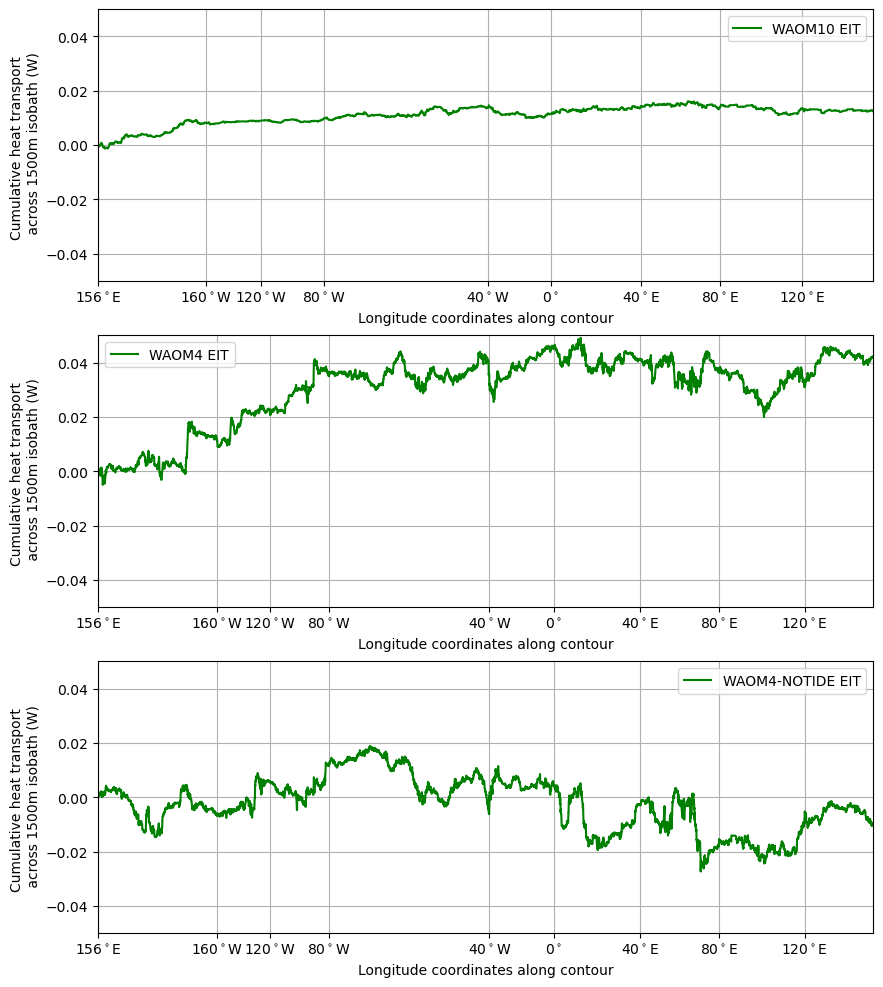

In [28]:
fig, ax = plt.subplots(nrows=3, figsize = (10, 12))

# WAOM10
ax[0].plot(dist_along_10km,np.cumsum(np.nanmean(Net_heat_transport_10km_eia_vint, axis=0)),'-g',label='WAOM10 EIT')
# ax[0].plot(dist_along_10km,np.cumsum(np.nanmean(Net_heat_transport_10km_iso_vint, axis=0)),'-b',label='Eddy-induced diffusion')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-0.05, 0.05)
ax[0].set_xlabel('Longitude coordinates along contour')
ax[0].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[0].grid('on')
ax[0].legend()

# WAOM4
ax[1].plot(dist_along_4km,np.cumsum(np.nanmean(Net_heat_transport_4km_eia_vint, axis=0)),'-g',label='WAOM4 EIT')
# ax[1].plot(dist_along_4km,np.cumsum(np.nanmean(Net_heat_transport_4km_iso_vint, axis=0)),'-b',label='Eddy-induced diffusion')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].set_ylim(-0.05, 0.05)
ax[1].set_xlabel('Longitude coordinates along contour')
ax[1].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[1].grid('on')
ax[1].legend()

# WAOM4-NOTIDE
ax[2].plot(dist_along_4km,np.cumsum(np.nanmean(Net_heat_transport_4kmNT_eia_vint, axis=0)),'-g',label='WAOM4-NOTIDE EIT')
# ax[2].plot(dist_along_4km,np.cumsum(np.nanmean(Net_heat_transport_4kmNT_iso_vint, axis=0)),'-b',label='Eddy-induced diffusion')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].set_ylim(-0.05, 0.05)
ax[2].set_xlabel('Longitude coordinates along contour')
ax[2].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[2].grid('on')
ax[2].legend()

name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_EIA-ISO_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)


# Calculate density and density-binned heat transport:



In [29]:
# rho grid for binning:
rho_grid=np.arange(26.,28.,0.05) # for sigma-0
rho_grid1=np.arange(31,32.7,0.05) # for sigma-1
rho_grid2=np.arange(36,37.5,0.05) # for sigma-2

len_rho_grid=len(rho_grid)
len_rho_grid1=len(rho_grid1)
len_rho_grid2=len(rho_grid2)


In [30]:
# use salt and temp along the contour to calculate sigma theta:
#salt_along_contour, temp_along_contour (z_rho_across_contour)
sigma_t_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],0) - 1000
sigma_1_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],1000) - 1000
sigma_2_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],2000) - 1000


### calculate net heat transport (Abs - Tf) across contour per density bin in $\sigma_\Theta$:

In [31]:
%%time
# sigma_t

#Net_heat_transport_10km.shape

Net_heat_transport_10km_irho = np.empty((len(Net_heat_transport_10km[:,0,0]),len_rho_grid,len(Net_heat_transport_10km[0,:,0]),len(Net_heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_t_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), Net_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_10km_irho[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_10km_irho_tavg = np.nanmean(Net_heat_transport_10km_irho, axis=0)
Net_heat_transport_10km_irho_tavg_cumsum = np.nancumsum(Net_heat_transport_10km_irho_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_10km_irho_cumsum = np.nancumsum(Net_heat_transport_10km_irho, axis=3) # cumsum along contour


CPU times: user 37.7 s, sys: 1.79 s, total: 39.5 s
Wall time: 39.5 s


### calculate Abs heat transport across contour per density bin in $\sigma_\Theta$:

In [32]:
Net_heat_transport_10km_irho.shape

(73, 40, 31, 2588)

In [33]:
%%time
# sigma_t

#Net_heat_transport_10km.shape

heat_transport_10km_irho = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_t_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        heat_transport_10km_irho[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
heat_transport_10km_irho_tavg = np.nanmean(heat_transport_10km_irho, axis=0)
heat_transport_10km_irho_tavg_cumsum = np.nancumsum(heat_transport_10km_irho_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
heat_transport_10km_irho_cumsum = np.nancumsum(heat_transport_10km_irho, axis=3) # cumsum along contour


CPU times: user 40.9 s, sys: 1.8 s, total: 42.7 s
Wall time: 42.7 s


### calculate Tf heat transport across contour per density bin in $\sigma_\Theta$:

In [34]:
%%time
# sigma_t

#Net_heat_transport_10km.shape

Tf_heat_transport_10km_irho = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Tf_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_t_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), Tf_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Tf_heat_transport_10km_irho[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho_tavg = np.nanmean(Tf_heat_transport_10km_irho, axis=0)
Tf_heat_transport_10km_irho_tavg_cumsum = np.nancumsum(Tf_heat_transport_10km_irho_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho_cumsum = np.nancumsum(Tf_heat_transport_10km_irho, axis=3) # cumsum along contour


CPU times: user 43.9 s, sys: 2.33 s, total: 46.2 s
Wall time: 46.2 s


### calculation using vol transport (Huon/Hvom) (depth-weighted)

In [35]:
%%time
# sigma_t

#vol_transport_10km.shape

vol_transport_10km_irho = np.empty((len(vol_transport_10km[:,0,0]),len_rho_grid,len(vol_transport_10km[0,:,0]),len(vol_transport_10km[0,0,:])))

for tt in np.arange(0,len(vol_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_t_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2))), vol_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.05/2)),sigma_tmp > (rho_grid[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        vol_transport_10km_irho[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
vol_transport_10km_irho_tavg = np.nanmean(vol_transport_10km_irho, axis=0)
vol_transport_10km_irho_tavg_cumsum = np.nancumsum(vol_transport_10km_irho_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
vol_transport_10km_irho_cumsum = np.nancumsum(vol_transport_10km_irho, axis=3) # cumsum along contour


CPU times: user 45.6 s, sys: 2.96 s, total: 48.5 s
Wall time: 48.5 s


### repeat calculations in $\sigma_1$

In [36]:
%%time
# NET HEAT TRANSP: sigma_t

Net_heat_transport_10km_irho1 = np.empty((len(Net_heat_transport_10km[:,0,0]),len_rho_grid1,len(Net_heat_transport_10km[0,:,0]),len(Net_heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_1_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid1):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2))), Net_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_10km_irho1[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_10km_irho1_tavg = np.nanmean(Net_heat_transport_10km_irho1, axis=0)
Net_heat_transport_10km_irho1_tavg_cumsum = np.nancumsum(Net_heat_transport_10km_irho1_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_10km_irho1_cumsum = np.nancumsum(Net_heat_transport_10km_irho1, axis=3) # cumsum along contour


CPU times: user 35.4 s, sys: 2.3 s, total: 37.7 s
Wall time: 37.7 s


In [37]:
%%time
# Absolute HEAT TRANSP: sigma_t

heat_transport_10km_irho1 = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid1,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_1_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid1):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2))), heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        heat_transport_10km_irho1[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
heat_transport_10km_irho1_tavg = np.nanmean(heat_transport_10km_irho1, axis=0)
heat_transport_10km_irho1_tavg_cumsum = np.nancumsum(heat_transport_10km_irho1_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
heat_transport_10km_irho1_cumsum = np.nancumsum(heat_transport_10km_irho1, axis=3) # cumsum along contour


CPU times: user 36.6 s, sys: 1.73 s, total: 38.4 s
Wall time: 38.4 s


In [38]:
%%time

Tf_heat_transport_10km_irho1 = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid1,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Tf_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_1_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid1):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2))), Tf_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Tf_heat_transport_10km_irho1[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho1_tavg = np.nanmean(Tf_heat_transport_10km_irho1, axis=0)
Tf_heat_transport_10km_irho1_tavg_cumsum = np.nancumsum(Tf_heat_transport_10km_irho1_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho1_cumsum = np.nancumsum(Tf_heat_transport_10km_irho1, axis=3) # cumsum along contour


CPU times: user 37.8 s, sys: 1.73 s, total: 39.5 s
Wall time: 39.5 s


In [39]:
%%time
# sigma_t

#vol_transport_10km.shape

vol_transport_10km_irho1 = np.empty((len(vol_transport_10km[:,0,0]),len_rho_grid1,len(vol_transport_10km[0,:,0]),len(vol_transport_10km[0,0,:])))

for tt in np.arange(0,len(vol_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_1_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid1):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2))), vol_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid1[irho]-(0.05/2)),sigma_tmp > (rho_grid1[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        vol_transport_10km_irho1[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
vol_transport_10km_irho1_tavg = np.nanmean(vol_transport_10km_irho1, axis=0)
vol_transport_10km_irho1_tavg_cumsum = np.nancumsum(vol_transport_10km_irho1_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
vol_transport_10km_irho1_cumsum = np.nancumsum(vol_transport_10km_irho1, axis=3) # cumsum along contour


CPU times: user 38.2 s, sys: 1.72 s, total: 40 s
Wall time: 40 s


### repeat calculations in $\sigma_2$

In [40]:
%%time
# sigma_2

Net_heat_transport_10km_irho2 = np.empty((len(Net_heat_transport_10km[:,0,0]),len_rho_grid2,len(Net_heat_transport_10km[0,:,0]),len(Net_heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), Net_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_10km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_10km_irho2_tavg = np.nanmean(Net_heat_transport_10km_irho2, axis=0)
Net_heat_transport_10km_irho2_tavg_cumsum = np.nancumsum(Net_heat_transport_10km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_10km_irho2_cumsum = np.nancumsum(Net_heat_transport_10km_irho2, axis=3) # cumsum along contour


CPU times: user 29.9 s, sys: 1.45 s, total: 31.3 s
Wall time: 31.3 s


In [86]:
%%time
# Absolute HEAT TRANSP: sigma_2

heat_transport_10km_irho2 = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid2,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        heat_transport_10km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
heat_transport_10km_irho2_tavg = np.nanmean(heat_transport_10km_irho2, axis=0)
heat_transport_10km_irho2_tavg_cumsum = np.nancumsum(heat_transport_10km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
heat_transport_10km_irho2_cumsum = np.nancumsum(heat_transport_10km_irho2, axis=3) # cumsum along contour


CPU times: user 33.3 s, sys: 1.53 s, total: 34.8 s
Wall time: 34.8 s


In [87]:
%%time
# Tf HEAT TRANSP: sigma_2

Tf_heat_transport_10km_irho2 = np.empty((len(heat_transport_10km[:,0,0]),len_rho_grid2,len(heat_transport_10km[0,:,0]),len(heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Tf_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), Tf_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Tf_heat_transport_10km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho2_tavg = np.nanmean(Tf_heat_transport_10km_irho2, axis=0)
Tf_heat_transport_10km_irho2_tavg_cumsum = np.nancumsum(Tf_heat_transport_10km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Tf_heat_transport_10km_irho2_cumsum = np.nancumsum(Tf_heat_transport_10km_irho2, axis=3) # cumsum along contour


CPU times: user 31.1 s, sys: 1.45 s, total: 32.5 s
Wall time: 32.5 s


In [88]:
%%time
# Volume TRANSP: sigma_2

vol_transport_10km_irho2 = np.empty((len(vol_transport_10km[:,0,0]),len_rho_grid2,len(vol_transport_10km[0,:,0]),len(vol_transport_10km[0,0,:])))

for tt in np.arange(0,len(vol_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), vol_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        vol_transport_10km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
vol_transport_10km_irho2_tavg = np.nanmean(vol_transport_10km_irho2, axis=0)
vol_transport_10km_irho2_tavg_cumsum = np.nancumsum(vol_transport_10km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
vol_transport_10km_irho2_cumsum = np.nancumsum(vol_transport_10km_irho2, axis=3) # cumsum along contour


CPU times: user 31.7 s, sys: 1.47 s, total: 33.2 s
Wall time: 33.2 s


In [41]:
rho_grid[[24, 26, 28, 30, 32, 34, 35]]

array([27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.75])

In [42]:
Net_heat_transport_10km_irho.shape

(73, 40, 31, 2588)

27.4


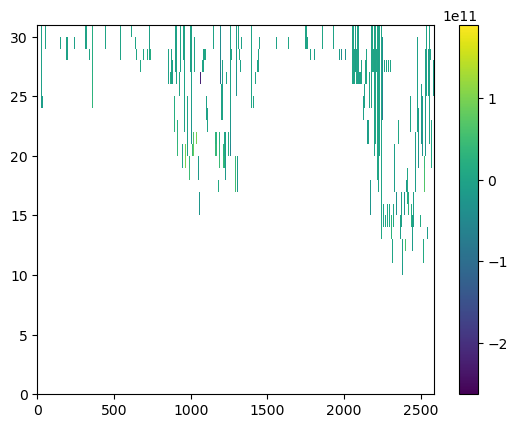

In [43]:
print(str(round(rho_grid[28],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[30,28,:,:]) # (time, irho, z_rho, contour_index)
plt.colorbar()

27.5


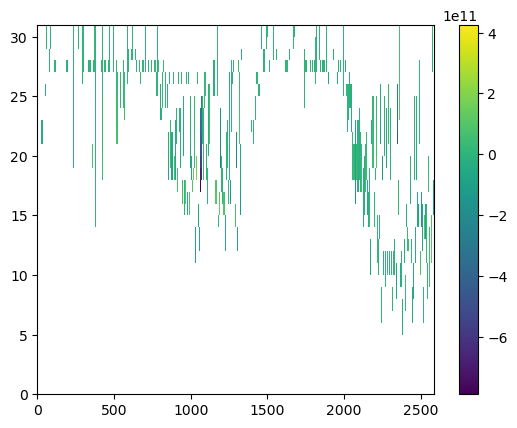

In [44]:
print(str(round(rho_grid[30],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[30,30,:,:])
plt.colorbar()

27.6


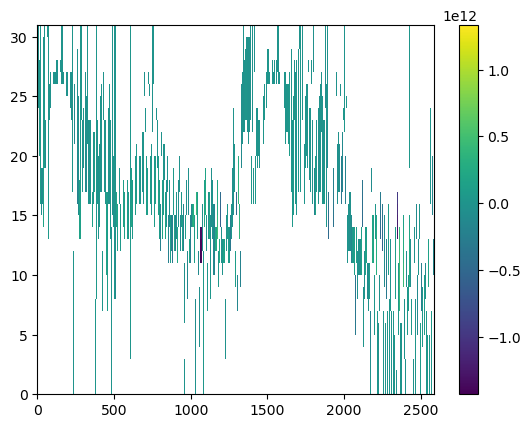

In [45]:
print(str(round(rho_grid[32],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[30,32,:,:])
plt.colorbar()

27.65


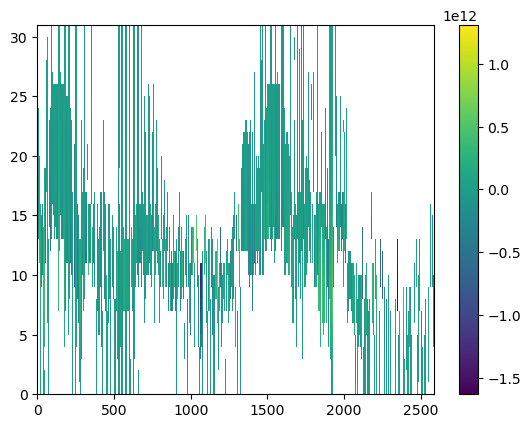

In [46]:
print(str(round(rho_grid[33],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[30,33,:,:])
plt.colorbar()

27.7


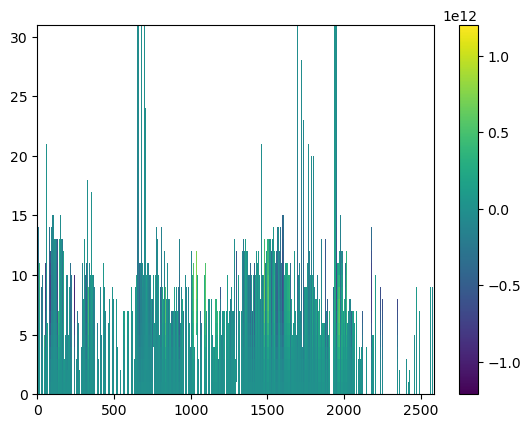

In [47]:
print(str(round(rho_grid[34],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[40,34,:,:])
plt.colorbar()

27.75


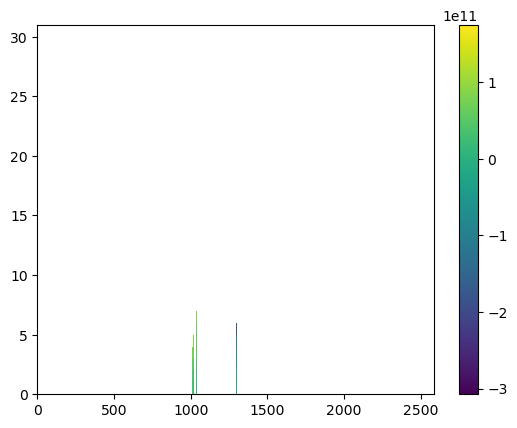

In [48]:
print(str(round(rho_grid[35],2)))
plt.pcolormesh(Net_heat_transport_10km_irho[0,35,:,:])
plt.colorbar()

In [49]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


# without cumsum along contour:

57 34


Text(0, 0.5, 'Volume transport (m$^{3}$s$^{-1}$)')

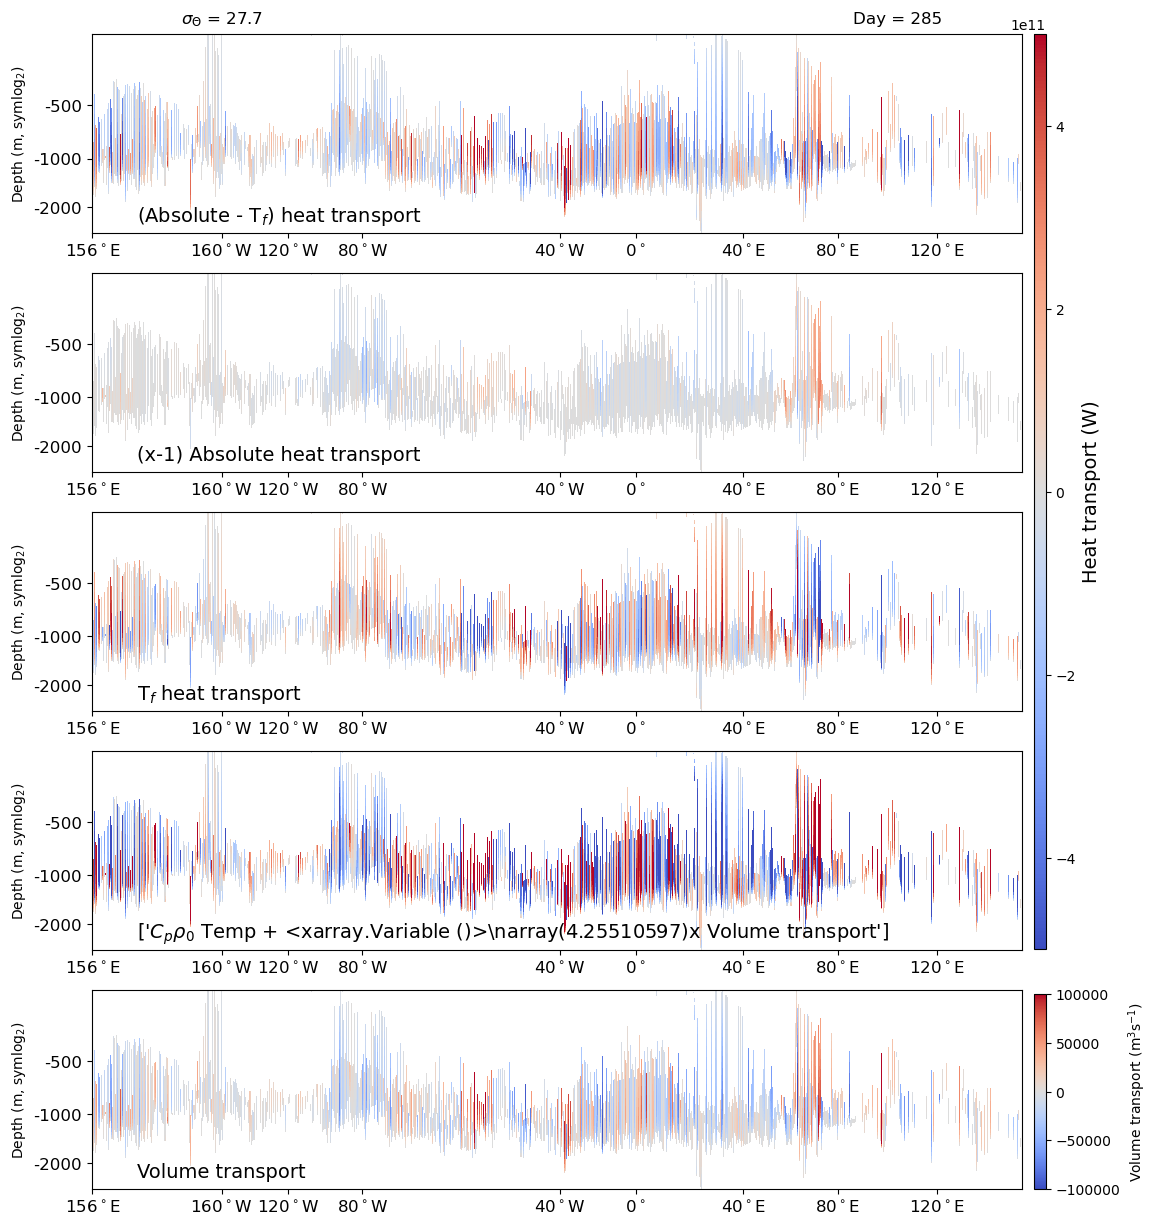

In [50]:
tt=57
ll=34
print(tt,ll)

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))

fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid[ll],2)),fontsize=12)

cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'Volume transport',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)

# cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]+3)*vol_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
# ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+10 x Volume transport'],fontsize=14)
ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')



57 29


Text(0, 0.5, 'Volume transport (m$^{3}$s$^{-1}$)')

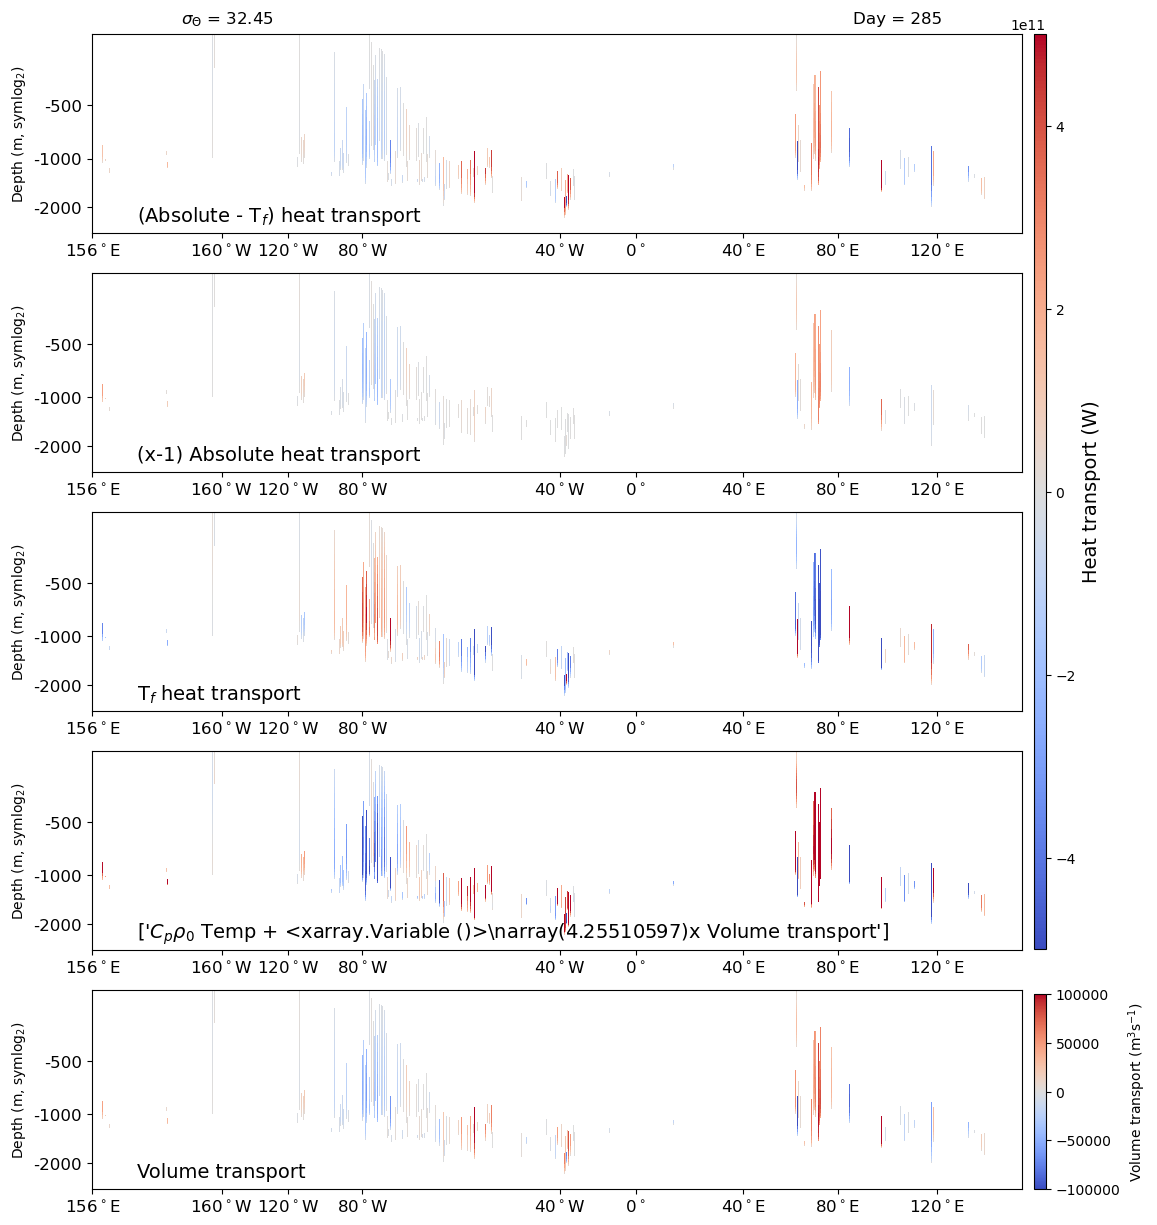

In [65]:
# SIGMA-1
tt=57
ll=29 # max=34 (32.7sig1
print(tt,ll)

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))

fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid1[ll],2)),fontsize=12)

cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho1[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'Volume transport',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)

# cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]+3)*vol_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
# ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+10 x Volume transport'],fontsize=14)
ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')



In [89]:
ll=19
print(ll,round(rho_grid2[ll],2))

19 36.95


57 22


Text(0, 0.5, 'Volume transport (m$^{3}$s$^{-1}$)')

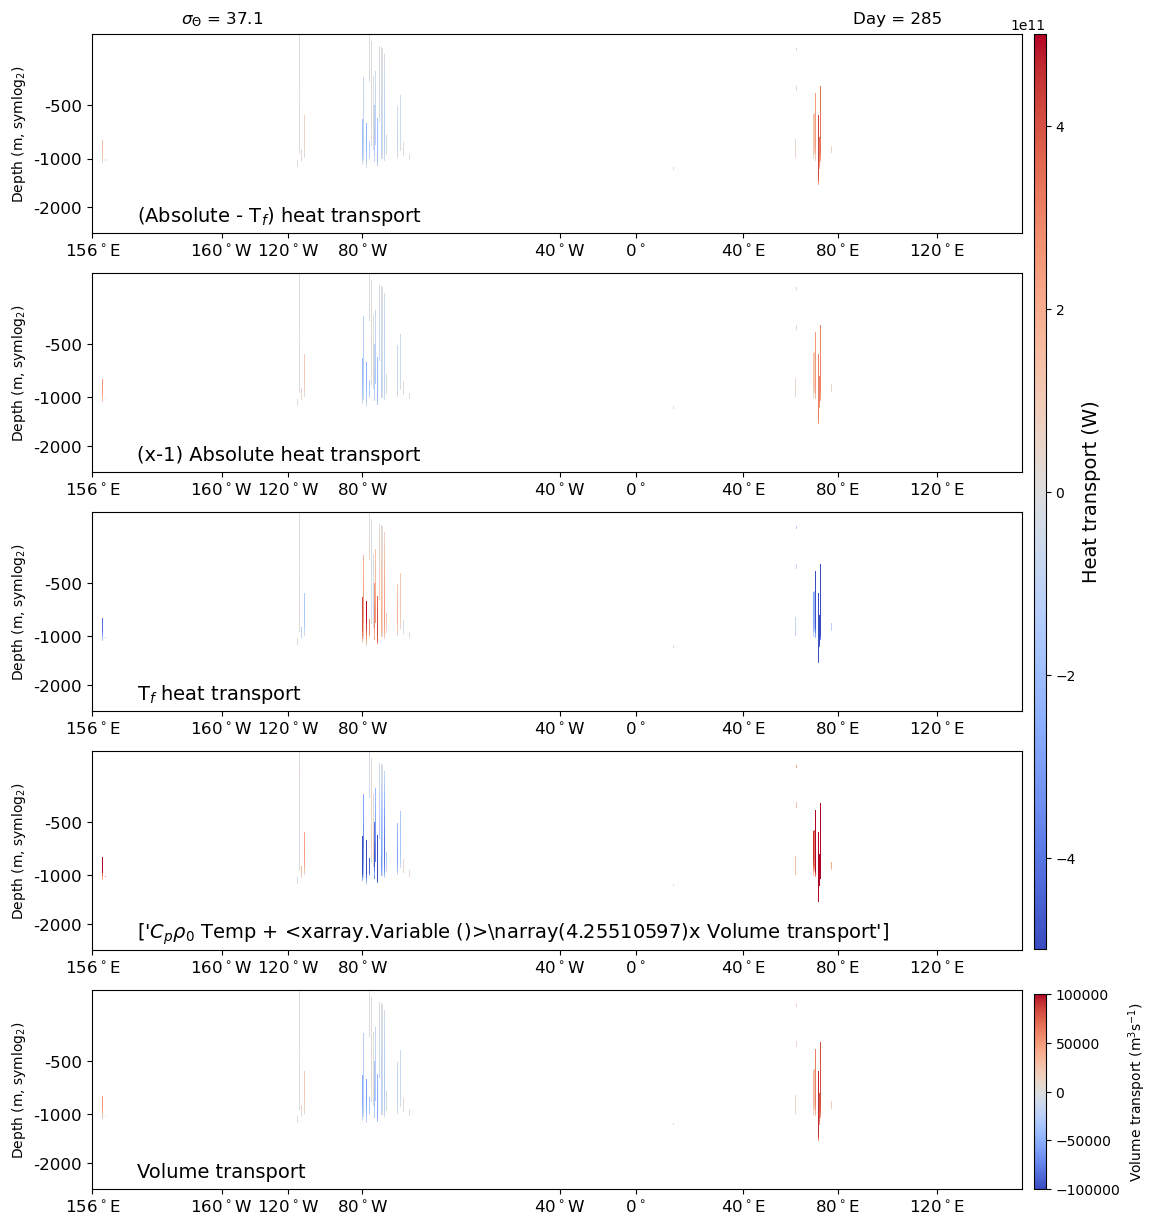

In [108]:
# SIGMA-2
tt=57
ll=22 # max=34 (32.7sig1
print(tt,ll)

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))

fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)

cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho2[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'Volume transport',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)

# cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]+3)*vol_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
# ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+10 x Volume transport'],fontsize=14)
ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')



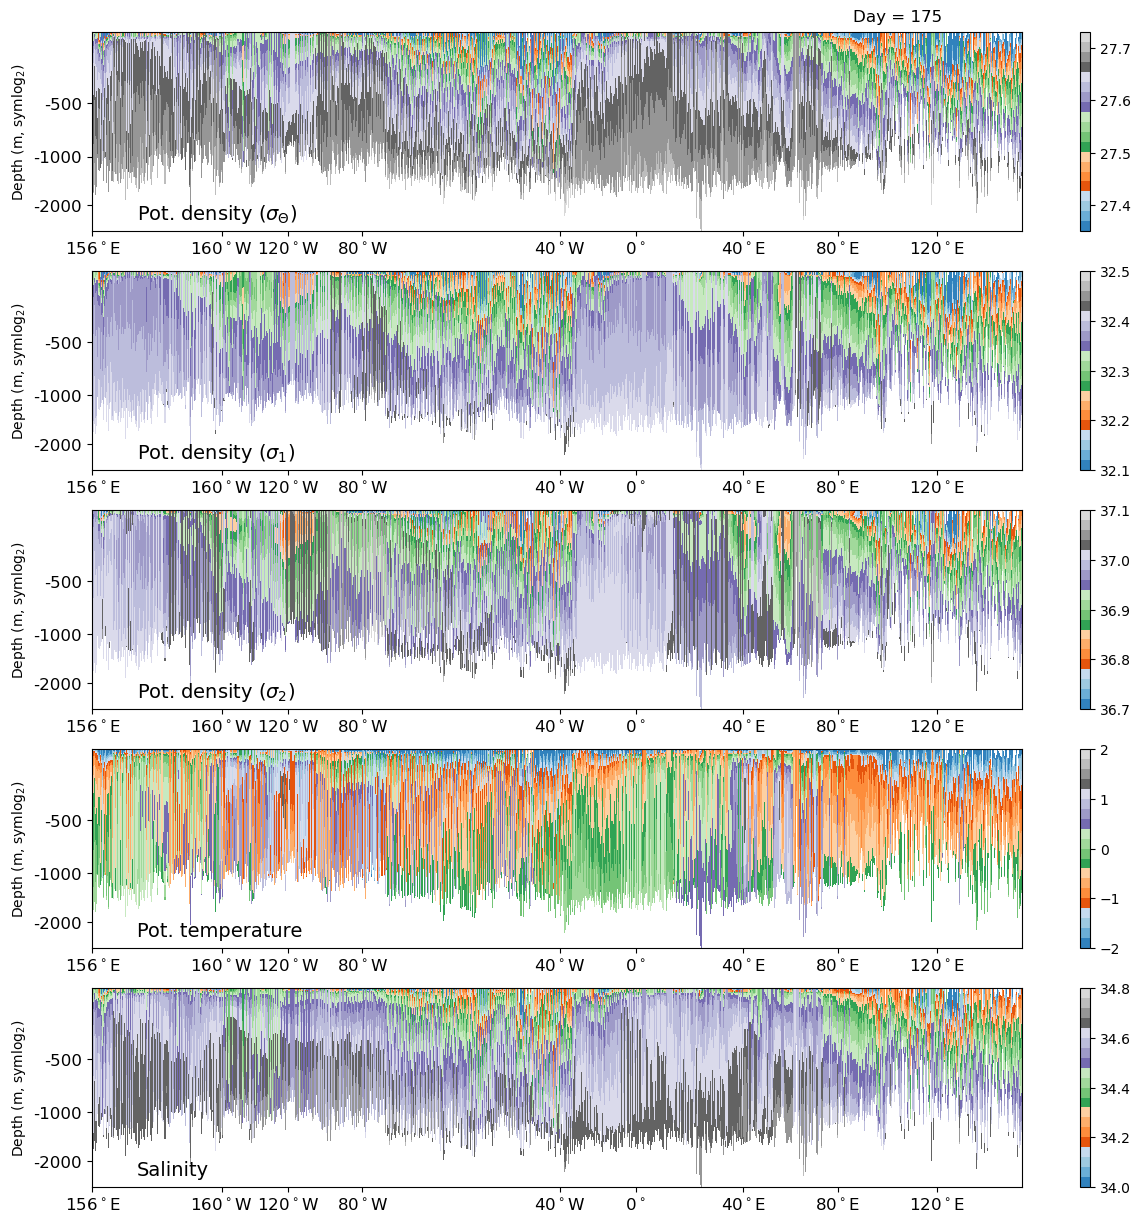

In [101]:
tt=35

fig, ax = plt.subplots(nrows=5, figsize = (15, 15))

ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)

cst = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_t_10km[tt,:,:], vmin=27.35 , vmax=27.73, cmap='tab20c')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'Pot. density ($\sigma_{\Theta}$)',fontsize=14)
fig.colorbar(cst, ax=ax[0])
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cs1 = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_1_10km[tt,:,:], vmin=32.1 , vmax=32.5, cmap='tab20c')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'Pot. density ($\sigma_1$)',fontsize=14)
fig.colorbar(cs1, ax=ax[1])
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cs2 = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_2_10km[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'Pot. density ($\sigma_2$)',fontsize=14)
fig.colorbar(cs2, ax=ax[2])
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ct = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],temp_10km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].text(1,-2500,'Pot. temperature',fontsize=14)
fig.colorbar(ct, ax=ax[3])
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

cs = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],salt_10km[tt,:,:], vmin=34 , vmax=34.8, cmap='tab20c')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'Salinity',fontsize=14)
fig.colorbar(cs, ax=ax[4])
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)


In [ ]:
# %%time
# ##Movie for transports variables (all possible):

# for ll in np.arange(30,35,1):
#     for tt in np.arange(0,73):
#         fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
#         ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
#         ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid[ll],2)),fontsize=12)

#         cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[0].set_xlim(0, dist_along_10km[-1])
#         ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
#         ax[0].set_yscale('symlog',base = 2, linthresh=700)
#         ax[0].set_ylabel('Depth (m, symlog$_2$)')
#         ax[0].set_yticklabels(['-2000','-1000','-500'])
#         ax[0].set_aspect('auto')
#         ax[0].tick_params(labelsize=12)

#         cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[1].set_xlim(0, dist_along_10km[-1])
#         ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
#         ax[1].set_yscale('symlog',base = 2, linthresh=700)
#         ax[1].set_ylabel('Depth (m, symlog$_2$)')
#         ax[1].set_yticklabels(['-2000','-1000','-500'])
#         ax[1].set_aspect('auto')
#         ax[1].tick_params(labelsize=12)

#         cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[2].set_xlim(0, dist_along_10km[-1])
#         ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
#         ax[2].set_yscale('symlog',base = 2, linthresh=700)
#         ax[2].set_ylabel('Depth (m, symlog$_2$)')
#         ax[2].set_yticklabels(['-2000','-1000','-500'])
#         ax[2].set_aspect('auto')
#         ax[2].tick_params(labelsize=12)

#         cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
#         ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[4].set_xlim(0, dist_along_10km[-1])
#         ax[4].text(1,-2500,'Volume transport',fontsize=14)
#         ax[4].set_yscale('symlog',base = 2, linthresh=700)
#         ax[4].set_ylabel('Depth (m, symlog$_2$)')
#         ax[4].set_yticklabels(['-2000','-1000','-500'])
#         ax[4].set_aspect('auto')
#         ax[4].tick_params(labelsize=12)

#         cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[3].set_xlim(0, dist_along_10km[-1])
#         ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+4.95degC x Volume transport'],fontsize=14)
#         ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
#         ax[3].set_yscale('symlog',base = 2, linthresh=700)
#         ax[3].set_ylabel('Depth (m, symlog$_2$)')
#         ax[3].set_yticklabels(['-2000','-1000','-500'])
#         ax[3].set_aspect('auto')
#         ax[3].tick_params(labelsize=12)

#         cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
#         cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#         cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#         cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
#         cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
#         cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')

#         name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_theta/waom10_All_heat_transp_rho=" + str(round(rho_grid[ll],2)) + "_tt=" + str(tt) + ".png"
#         plt.savefig(name_fig, dpi=300)
#         plt.close()

# SIGMA1 movie

In [ ]:
# %%time
# ##Movie for transports variables (all possible):

# # for ll in np.arange(22,34,1):
# for ll in np.arange(30,34,1):
#     for tt in np.arange(0,73):
#         fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
#         ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
#         ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid1[ll],2)),fontsize=12)

#         cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[0].set_xlim(0, dist_along_10km[-1])
#         ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
#         ax[0].set_yscale('symlog',base = 2, linthresh=700)
#         ax[0].set_ylabel('Depth (m, symlog$_2$)')
#         ax[0].set_yticklabels(['-2000','-1000','-500'])
#         ax[0].set_aspect('auto')
#         ax[0].tick_params(labelsize=12)

#         cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[1].set_xlim(0, dist_along_10km[-1])
#         ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
#         ax[1].set_yscale('symlog',base = 2, linthresh=700)
#         ax[1].set_ylabel('Depth (m, symlog$_2$)')
#         ax[1].set_yticklabels(['-2000','-1000','-500'])
#         ax[1].set_aspect('auto')
#         ax[1].tick_params(labelsize=12)

#         cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[2].set_xlim(0, dist_along_10km[-1])
#         ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
#         ax[2].set_yscale('symlog',base = 2, linthresh=700)
#         ax[2].set_ylabel('Depth (m, symlog$_2$)')
#         ax[2].set_yticklabels(['-2000','-1000','-500'])
#         ax[2].set_aspect('auto')
#         ax[2].tick_params(labelsize=12)

#         cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho1[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
#         ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                   '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[4].set_xlim(0, dist_along_10km[-1])
#         ax[4].text(1,-2500,'Volume transport',fontsize=14)
#         ax[4].set_yscale('symlog',base = 2, linthresh=700)
#         ax[4].set_ylabel('Depth (m, symlog$_2$)')
#         ax[4].set_yticklabels(['-2000','-1000','-500'])
#         ax[4].set_aspect('auto')
#         ax[4].tick_params(labelsize=12)

#         cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho1[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#         ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#         ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#         ax[3].set_xlim(0, dist_along_10km[-1])
#         ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+4.95degC x Volume transport'],fontsize=14)
#         # ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
#         ax[3].set_yscale('symlog',base = 2, linthresh=700)
#         ax[3].set_ylabel('Depth (m, symlog$_2$)')
#         ax[3].set_yticklabels(['-2000','-1000','-500'])
#         ax[3].set_aspect('auto')
#         ax[3].tick_params(labelsize=12)

#         cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
#         cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#         cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#         cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
#         cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
#         cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')

#         name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_theta/waom10_All_heat_transp_rho1=" + str(round(rho_grid1[ll],2)) + "_tt=" + str(tt) + ".png"
#         plt.savefig(name_fig, dpi=300)
#         plt.close()

# SIGMA2 movie

In [135]:
%%time
##Movie for transports variables (all possible):

# for ll in np.arange(22,34,1):
for ll in np.arange(15,24,1):
    for tt in np.arange(0,73):
        fig, ax = plt.subplots(nrows=5, figsize = (12, 15))
        ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
        ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)

        cht = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
        ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
        ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                                  '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
        ax[0].set_xlim(0, dist_along_10km[-1])
        ax[0].text(1,-2500,'(Absolute - T$_f$) heat transport',fontsize=14)
        ax[0].set_yscale('symlog',base = 2, linthresh=700)
        ax[0].set_ylabel('Depth (m, symlog$_2$)')
        ax[0].set_yticklabels(['-2000','-1000','-500'])
        ax[0].set_aspect('auto')
        ax[0].tick_params(labelsize=12)

        cht = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],-heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
        ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
        ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                                  '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
        ax[1].set_xlim(0, dist_along_10km[-1])
        ax[1].text(1,-2500,'(x-1) Absolute heat transport',fontsize=14)
        ax[1].set_yscale('symlog',base = 2, linthresh=700)
        ax[1].set_ylabel('Depth (m, symlog$_2$)')
        ax[1].set_yticklabels(['-2000','-1000','-500'])
        ax[1].set_aspect('auto')
        ax[1].tick_params(labelsize=12)

        cht = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Tf_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
        ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
        ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                                  '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
        ax[2].set_xlim(0, dist_along_10km[-1])
        ax[2].text(1,-2500,'T$_f$ heat transport',fontsize=14)
        ax[2].set_yscale('symlog',base = 2, linthresh=700)
        ax[2].set_ylabel('Depth (m, symlog$_2$)')
        ax[2].set_yticklabels(['-2000','-1000','-500'])
        ax[2].set_aspect('auto')
        ax[2].tick_params(labelsize=12)

        cvt = ax[4].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],vol_transport_10km_irho2[tt,ll,:,:], vmin=-1e5 , vmax=1e5, cmap='coolwarm')
        ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
        ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                                  '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
        ax[4].set_xlim(0, dist_along_10km[-1])
        ax[4].text(1,-2500,'Volume transport',fontsize=14)
        ax[4].set_yscale('symlog',base = 2, linthresh=700)
        ax[4].set_ylabel('Depth (m, symlog$_2$)')
        ax[4].set_yticklabels(['-2000','-1000','-500'])
        ax[4].set_aspect('auto')
        ax[4].tick_params(labelsize=12)

        cht = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],Cp*rho0*(temp_10km[tt,:,:]-(np.min(temp_10km)))*vol_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
        ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
        ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
        ax[3].set_xlim(0, dist_along_10km[-1])
        ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp+4.95degC x Volume transport'],fontsize=14)
        # ax[3].text(1,-2500,['$ C_p \rho_0 $ Temp + ' + str(-np.min(temp_10km)) + 'x Volume transport'],fontsize=14)
        ax[3].set_yscale('symlog',base = 2, linthresh=700)
        ax[3].set_ylabel('Depth (m, symlog$_2$)')
        ax[3].set_yticklabels(['-2000','-1000','-500'])
        ax[3].set_aspect('auto')
        ax[3].tick_params(labelsize=12)

        cax1 = plt.axes([0.91, 0.27, 0.01, 0.61])
        cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
        cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

        cax2 = plt.axes([0.91, 0.11, 0.01, 0.13])
        cb = plt.colorbar(cvt, cax=cax2, orientation='vertical')
        cb.ax.set_ylabel('Volume transport (m$^{3}$s$^{-1}$)')

        name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_theta/waom10_All_heat_transp_rho2=" + str(round(rho_grid2[ll],2)) + "_tt=" + str(tt) + ".png"
        plt.savefig(name_fig, dpi=300)
        plt.close()

CPU times: user 25min 31s, sys: 21 s, total: 25min 52s
Wall time: 26min 4s


# T/S/DENS movie

In [114]:
%%time
# Movie for density/temperature/salinity:

for tt in np.arange(0,73):
    fig, ax = plt.subplots(nrows=4, figsize = (12, 14))

    ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
        
    cst = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_t_10km[tt,:,:], vmin=27.35 , vmax=27.73, cmap='tab20c')
    ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[0].set_xlim(0, dist_along_10km[-1])
    ax[0].text(1,-2500,'Pot. density ($\sigma_{\Theta}$)',fontsize=14)
    fig.colorbar(cst, ax=ax[0])
    ax[0].set_yscale('symlog',base = 2, linthresh=700)
    ax[0].set_ylabel('Depth (m, symlog$_2$)')
    ax[0].set_yticklabels(['-2000','-1000','-500'])
    ax[0].set_aspect('auto')
    ax[0].tick_params(labelsize=12)
        
    cst = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_1_10km[tt,:,:], vmin=32.1 , vmax=32.5, cmap='tab20c')
    ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[1].set_xlim(0, dist_along_10km[-1])
    ax[1].text(1,-2500,'Pot. density ($\sigma_{1}$)',fontsize=14)
    fig.colorbar(cst, ax=ax[1])
    ax[1].set_yscale('symlog',base = 2, linthresh=700)
    ax[1].set_ylabel('Depth (m, symlog$_2$)')
    ax[1].set_yticklabels(['-2000','-1000','-500'])
    ax[1].set_aspect('auto')
    ax[1].tick_params(labelsize=12)

    ct = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],temp_10km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
    ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[2].set_xlim(0, dist_along_10km[-1])
    ax[2].text(1,-2500,'Pot. temperature',fontsize=14)
    fig.colorbar(ct, ax=ax[2])
    ax[2].set_yscale('symlog',base = 2, linthresh=700)
    ax[2].set_ylabel('Depth (m, symlog$_2$)')
    ax[2].set_yticklabels(['-2000','-1000','-500'])
    ax[2].set_aspect('auto')
    ax[2].tick_params(labelsize=12)

    cs = ax[3].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],salt_10km[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
    ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[3].set_xlim(0, dist_along_10km[-1])
    ax[3].text(1,-2500,'Salinity',fontsize=14)
    fig.colorbar(cs, ax=ax[3])
    ax[3].set_yscale('symlog',base = 2, linthresh=700)
    ax[3].set_ylabel('Depth (m, symlog$_2$)')
    ax[3].set_yticklabels(['-2000','-1000','-500'])
    ax[3].set_aspect('auto')
    ax[3].tick_params(labelsize=12)

    name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_theta/waom10_sigT+1_temp_salt_tt=" + str(tt) + ".png"
    plt.savefig(name_fig, dpi=300)
    plt.close()

CPU times: user 2min 46s, sys: 3.11 s, total: 2min 49s
Wall time: 2min 50s


## Doing some TS-diagrams:

In [118]:
# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -4. + (0.1 * -4.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 5 + (0.1 * 5.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-4,5,ydim)
si = np.linspace(31,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        # dens[j,i]=gsw.rho(si[i],ti[j],0) # sigma-theta
        # dens[j,i]=gsw.rho(si[i],ti[j],1000) # sigma-1000
        dens[j,i]=gsw.rho(si[i],ti[j],2000) # sigma-2000
# Substract 1000 to convert to sigma-2
dens = dens - 1000

tmin, tmax, smin, smax sizes=, -4.4 5.5 29.7 36.36


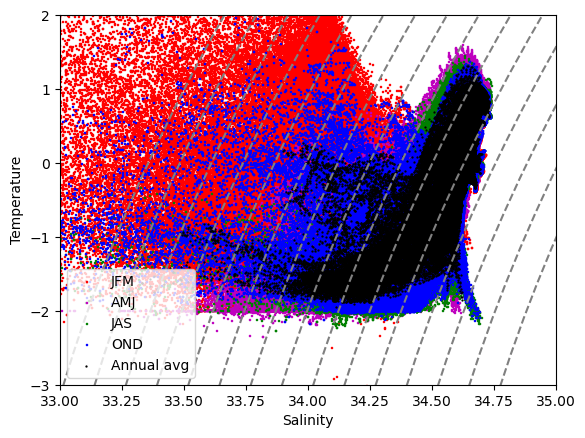

In [120]:
fig, ax = plt.subplots()
# CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(27.0,28.0,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
# ax.clabel(CS, CS.levels, inline=True, fontsize=10)
# CS1 = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(27.0,32.7,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
# ax.clabel(CS1, CS1.levels, inline=True, fontsize=10)
CS2 = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax.clabel(CS2, CS2.levels, inline=True, fontsize=10)

plt.scatter(salt_10km[sum_5d[0],:,:],temp_10km[sum_5d[0],:,:],color='r',marker=",", s=(72./fig.dpi)**2, label='JFM')
plt.scatter(salt_10km[aut_5d[0],:,:],temp_10km[aut_5d[0],:,:],color='m',marker=",", s=(72./fig.dpi)**2, label='AMJ')
plt.scatter(salt_10km[win_5d[0],:,:],temp_10km[win_5d[0],:,:],color='g',marker=",", s=(72./fig.dpi)**2, label='JAS')
plt.scatter(salt_10km[spr_5d[0],:,:],temp_10km[spr_5d[0],:,:],color='b',marker=",", s=(72./fig.dpi)**2, label='OND')
plt.scatter(np.nanmean(salt_10km,axis=0),np.nanmean(temp_10km,axis=0),color='k',marker="p", s=(72./fig.dpi)**2, label='Annual avg')
plt.xlim([33,35])
plt.ylim([-3,2])
# plt.title('Annual avg')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()

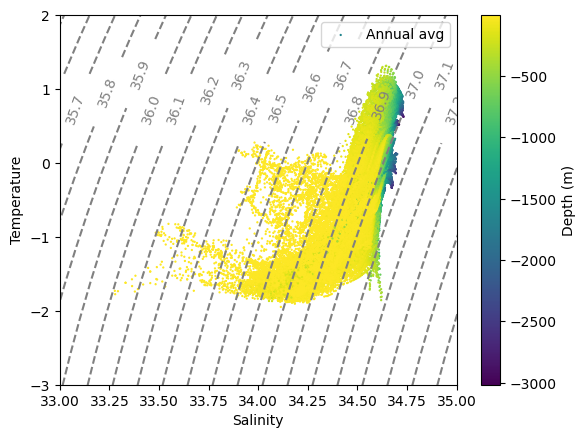

In [143]:
fig, ax = plt.subplots()
CS2 = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax.clabel(CS2, CS2.levels, inline=True, fontsize=10)

sc = plt.scatter(np.nanmean(salt_10km,axis=0),np.nanmean(temp_10km,axis=0),c=np.nanmean(z_rho_10km,axis=0),marker="p", s=(72./fig.dpi)**2, label='Annual avg')
plt.xlim([33,35])
plt.ylim([-3,2])
# plt.title('Annual avg')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()

cb=plt.colorbar(sc)
cb.ax.tick_params(direction='out')
cb.set_label('Depth (m)')

In [57]:
import iris
import iris.iterate
import iris.coords
import iris.plot as iplt

In [ ]:
# Load the gridded temperature and salinity data.
    fname = iris.sample_data_path("atlantic_profiles.nc")
    cubes = iris.load(fname)
    (theta,) = cubes.extract("sea_water_potential_temperature")
    (salinity,) = cubes.extract("sea_water_practical_salinity")

    # Extract profiles of temperature and salinity from a particular point in
    # the southern portion of the domain, and limit the depth of the profile
    # to 1000m.
    lon_cons = iris.Constraint(longitude=330.5)
    lat_cons = iris.Constraint(latitude=lambda l: -10 < l < -9)
    depth_cons = iris.Constraint(depth=lambda d: d <= 1000)
    theta_1000m = theta.extract(depth_cons & lon_cons & lat_cons)
    salinity_1000m = salinity.extract(depth_cons & lon_cons & lat_cons)

In [ ]:
for rang in np.arange(0,31):
    for s, t in iris.iterate.izip(salt_10km[:,rang,:], temp_10km[:,rang,:], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=z_rho_10km[:,rang,:], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)


# integrated over circumpolar domain per density classes:

In [132]:
# Calculate total sum per density bin:

Sum_sigma0 = np.empty(len(rho_grid)) # 
for ll in np.arange(0,len(rho_grid),1):
    Sum_sigma0[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_10km_irho[:,ll,:,:], axis=0),axis=0))
    
Sum_sigma1 = np.empty(len(rho_grid1)) # 
for ll in np.arange(0,len(rho_grid1),1):
    Sum_sigma1[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_10km_irho1[:,ll,:,:], axis=0),axis=0))
    
Sum_sigma2 = np.empty(len(rho_grid2)) # 
for ll in np.arange(0,len(rho_grid2),1):
    Sum_sigma2[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0),axis=0))
    

Text(0.5, 0, 'Pot. density ($\\sigma_2$)')

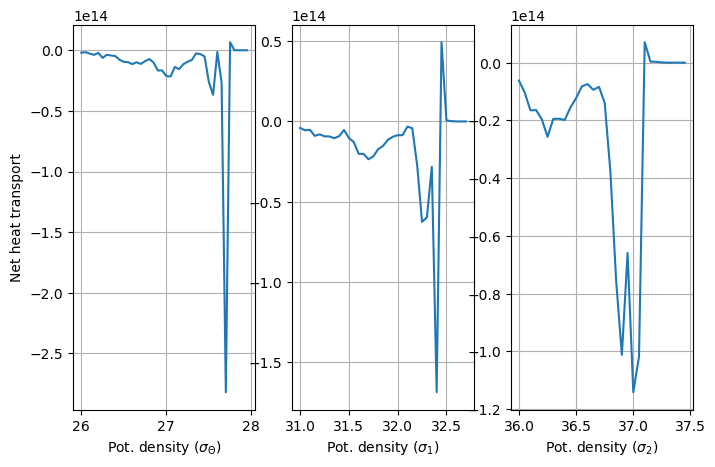

In [134]:
fig, ax = plt.subplots(ncols=3, figsize = (8, 5))

ax[0].plot(rho_grid,Sum_sigma0, label='$\sigma_{\Theta}$')
ax[0].grid()
ax[1].plot(rho_grid1,Sum_sigma1, label='$\sigma_{1}$')
ax[1].grid()
ax[2].plot(rho_grid2,Sum_sigma2, label='$\sigma_{2}$')
ax[2].grid()

ax[0].set_xlabel('Pot. density ($\sigma_{\Theta}$)')
ax[0].set_ylabel('Net heat transport')# (Abs-T$_{f}$, 10$^{15}$W'])
ax[1].set_xlabel('Pot. density ($\sigma_1$)')
ax[2].set_xlabel('Pot. density ($\sigma_2$)')


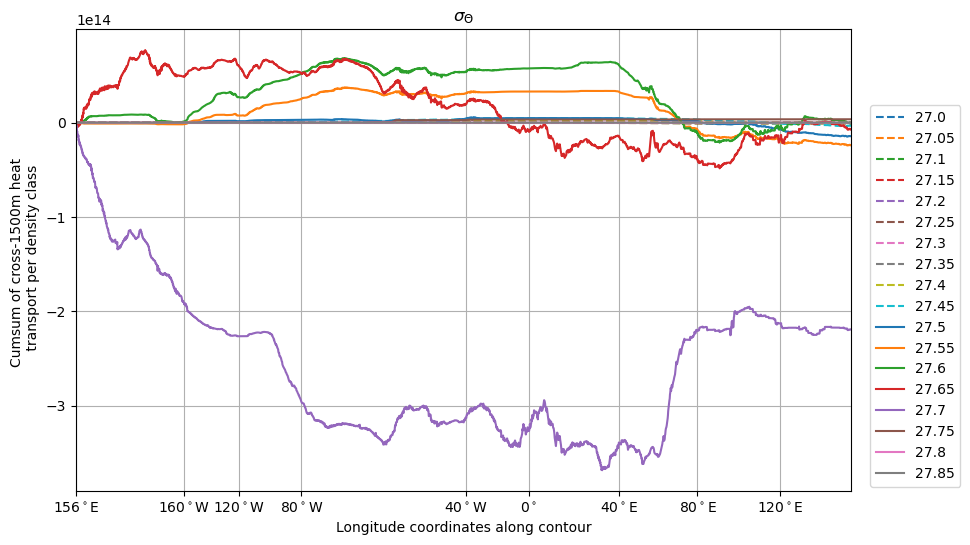

In [80]:
# plot sigma_t

fig, ax = plt.subplots(nrows=1, figsize = (10, 6))

xx=0
for ll in np.arange(20,30,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid[ll],2)))       # 1. time-mean, 2. vertical integral
    # ax.plot(dist_along_10km,np.sum(np.cumsum(np.nanmean(Net_heat_transport_10km_irho_cumsum[:,ll:-1,:,:], axis=0),axis=1),axis=0),'-',label=str(round(rho_grid[ll],2)))       # 1. time-mean, 2. cumsum on density class, 3. vertical integral
for ll in np.arange(30,38,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid[ll],2)))       # 1. time-mean, 2. vertical integral

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])
# ax.set_ylim(-1.5e14, 8e14)
ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
ax.grid('on')
ax.legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
plt.title('$\sigma_{\Theta}$')

name_fig='WAOM10_Cross-1500m_cumtransport_Sigma0bin_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)

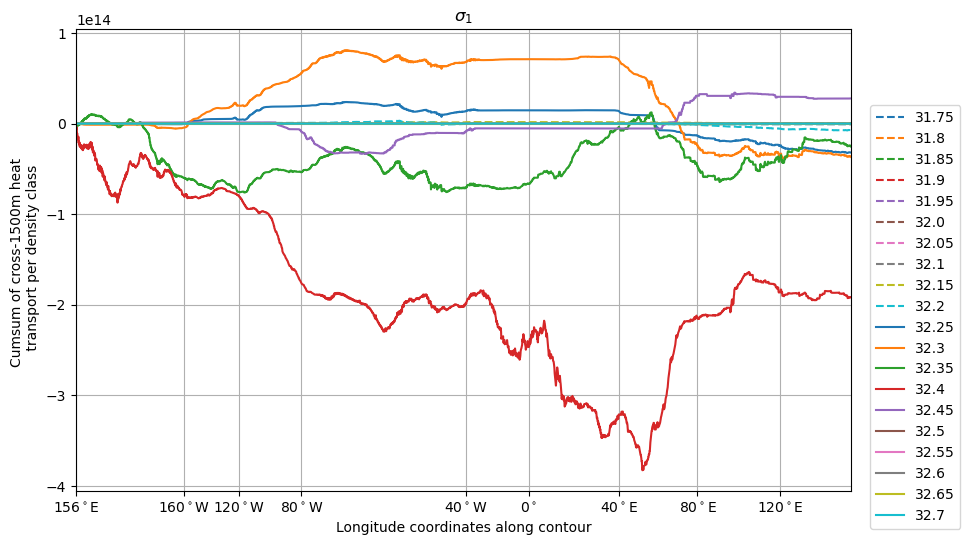

In [82]:
# plot sigma_1

fig, ax = plt.subplots(nrows=1, figsize = (10, 6))

xx=0
for ll in np.arange(15,25,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho1_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid1[ll],2)))       # 1. time-mean, 2. vertical integral
for ll in np.arange(25,35,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho1_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid1[ll],2)))       # 1. time-mean, 2. vertical integral

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])
# ax.set_ylim(-1.5e14, 8e14)
ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
ax.grid('on')
ax.legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
plt.title('$\sigma_{1}$')

name_fig='WAOM10_Cross-1500m_cumtransport_Sigma1bin_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)


In [83]:
ll=28
print(ll, str(round(rho_grid1[ll],2)))

28 32.4


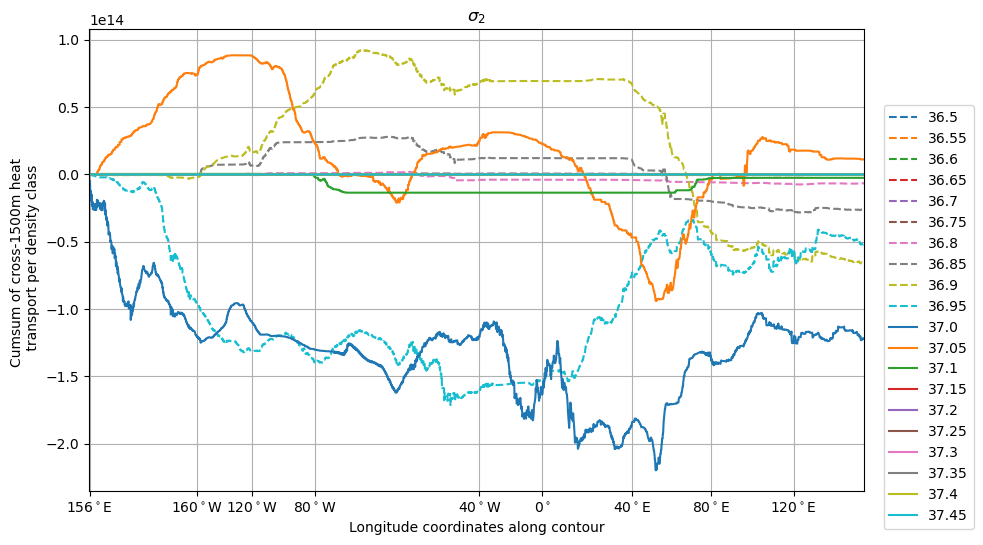

In [85]:
# plot sigma_2

fig, ax = plt.subplots(nrows=1, figsize = (10, 6))

xx=0
for ll in np.arange(10,20,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
for ll in np.arange(20,30,1):
    ax.plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    
ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])
# ax.set_ylim(-1.5e14, 8e14)
ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
ax.grid('on')
ax.legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
plt.title('$\sigma_{2}$')

name_fig='WAOM10_Cross-1500m_cumtransport_Sigma2bin_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)
